<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/Callbacks_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tf-nightly

In [0]:
import tensorflow as tf

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4954 - accuracy: 0.8263
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3715 - accuracy: 0.8657
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8785
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8852
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8918
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8950
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.8984
Epoch 8/25
1854/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9039
 Training stopping now. accuracy reached 90 !
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9039


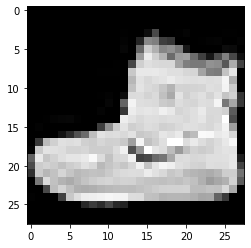

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback


class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\n Training stopping now. accuracy reached 90 !")
      self.model.stop_training = True


callback = MyCallback()

# Input data
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_data, training_labels), (testing_data, testing_labels) = fashion_mnist.load_data()
training_data = training_data / 255.0
testing_data = testing_data / 255.0
plt.imshow(training_data[0], cmap='gray')

# Network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_data, training_labels, epochs=25, callbacks=[callback])